In [ ]:
import pandas as pd
import numpy as np

datos = pd.read_csv(
    "/content/drive/MyDrive/AA DATOS/ResultadosElectorales_2023.csv",
    dtype={'Columna7': str, 'Columna10': float, 'Columna11': str, 'Columna20': str}
) #Esto lo tuve que hacer porque no me leía el archivo por los datos mixtos de estas columnas

datos.head()
datos.tail(5)
datos.index
type(datos.index)
datos.columns
type(datos.columns)
datos.values
type(datos.values)
datos.shape
valores_votos_tipo = datos['votos_tipo'].unique()
print(valores_votos_tipo)

agrupaciones = datos ["agrupacion_nombre"].unique()
print(agrupaciones)
ClavesAgrupaciones = datos ["agrupacion_id"].unique()
print(ClavesAgrupaciones)

agrupaciones_dict = datos[['agrupacion_id', 'agrupacion_nombre']].drop_duplicates().set_index('agrupacion_id')['agrupacion_nombre'].to_dict()

for clave, valor in agrupaciones_dict.items():
    print(f"Clave: {clave} -> Agrupación: {valor}")


CirEl = datos["distrito_nombre"]. unique()
print(CirEl)
ClavesCirEl = datos["distrito_id"]. unique()
print(ClavesCirEl)

distritos_dict = datos[['distrito_id', 'distrito_nombre']].drop_duplicates().set_index('distrito_id')['distrito_nombre'].to_dict()

for clave, valor in distritos_dict.items():
    print(f"ID de Distrito: {clave} -> Nombre de Distrito: {valor}")

# Filtramos los datos de la Ciudad Autónoma de Buenos Aires
datos_caba = datos[datos['distrito_id'] == 1]
datos_caba.head()
datos_caba.tail(5)
datos_caba.index
type(datos_caba.index)
datos_caba.columns
type(datos_caba.columns)
datos_caba.values
type(datos_caba.values)
datos_caba.shape
mesa_electores_tipo = datos_caba['mesa_electores']
print(mesa_electores_tipo)
cargos_tipo = datos_caba['cargo_nombre'].unique()
print(cargos_tipo)

## Filtramos los datos de Jefe/a de Gobierno en la Ciudad Autónoma de Buenos Aires
datos_jefe_gobierno = datos_caba[datos_caba['cargo_nombre'] == 'JEFE/A DE GOBIERNO']

# Sumamos los electores para obtener la cantidad total
total_electores = datos_jefe_gobierno['mesa_electores'].sum()

# Contamos la cantidad de mesas
cantidad_mesas = datos_jefe_gobierno['mesa_id'].nunique()

# Calculamos la participación
participacion = (datos_jefe_gobierno['votos_cantidad'].sum() / total_electores) * 100

# Filtramos por tipos de votos
votos_nulos = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'NULO']['votos_cantidad'].sum()
votos_impugnados = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'IMPUGNADO']['votos_cantidad'].sum()
votos_recurridos = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'RECURRIDO']['votos_cantidad'].sum()
votos_comando = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'COMANDO']['votos_cantidad'].sum()
votos_positivos = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()
votos_en_blanco = datos_jefe_gobierno[datos_jefe_gobierno['votos_tipo'] == 'EN BLANCO']['votos_cantidad'].sum()

# Imprimimos los resultados
print(f"Cantidad de mesas: {cantidad_mesas}")
print(f"Total de electores: {total_electores}")##### Este resultado da mal, aún no logro hacer que de el número correcto
print(f"Participación: {participacion:.2f}%")
print(f"Votos nulos: {votos_nulos}")
print(f"Votos impugnados: {votos_impugnados}")
print(f"Votos recurridos: {votos_recurridos}")
print(f"Votos comando: {votos_comando}")
print(f"Votos positivos: {votos_positivos}")
print(f"Votos en blanco: {votos_en_blanco}")

from IPython.display import display

display(datos)

print(datos.head())

<ipython-input-2-3c21c0dadc1f>:4: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(


['NULO' 'IMPUGNADO' 'RECURRIDO' 'COMANDO' 'POSITIVO' 'EN BLANCO']
[nan 'UNION POR LA PATRIA' 'JUNTOS POR EL CAMBIO' 'LA LIBERTAD AVANZA'
 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'
 'HACEMOS POR NUESTRO PAIS' 'ARRIBA NEUQUEN' 'MOVIMIENTO POPULAR NEUQUINO'
 'UNION POR SAN LUIS' 'UNION Y LIBERTAD'
 'FRENTE RENOVADOR DE LA CONCORDIA - INNOVACION FEDERAL'
 'PARTIDO AGRARIO Y SOCIAL' 'DEMOCRATA CRISTIANO' 'CAMBIA JUJUY'
 'RENOVADOR FEDERAL' 'CAMBIA SANTA CRUZ' 'POR SANTA CRUZ'
 'FUERZA REPUBLICANA' 'MOVIMIENTO LIBRES DEL SUR' 'LA FUERZA DE SANTA FE'
 'FRENTE CIVICO POR SANTIAGO' 'FRENTE RENOVADOR' 'JUNTOS POR ENTRE RIOS'
 'MAS PARA ENTRE RIOS' 'AUTONOMISTA' 'SI - SALTA INDEPENDIENTE'
 'AHORA PATRIA' 'JUNTOS POR EL CAMBIO CHUBUT' 'CAMBIA MENDOZA'
 'SOMOS FUEGUINOS' 'JUNTOS POR EL CAMBIO TDF' 'HACEMOS POR NUESTRO PAÍS'
 'REPUBLICANOS UNIDOS' 'ENCUENTRO POR CORRIENTES - ECO+VAMOS CORRIENTES'
 'FE' 'JUNTOS SOMOS RIO NEGRO' 'JUNTOS POR EL CAMBIO LA PAMPA'
 'CONSTRUIMOS FRAY MAMERTO ESQUIU'

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868097,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,0,NaN,0.0,NaN,COMANDO,0
5868098,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10802,UNION POR LA PATRIA,NaN,NaN,POSITIVO,40
5868099,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10803,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,22
5868100,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10801,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,18


    año eleccion_tipo recuento_tipo padron_tipo  distrito_id  \
0  2023       GENERAL    PROVISORIO      NORMAL            1   
1  2023       GENERAL    PROVISORIO      NORMAL            1   
2  2023       GENERAL    PROVISORIO      NORMAL            1   
3  2023       GENERAL    PROVISORIO      NORMAL            1   
4  2023       GENERAL    PROVISORIO      NORMAL            1   

                   distrito_nombre  seccionprovincial_id  \
0  Ciudad Autónoma de Buenos Aires                     0   
1  Ciudad Autónoma de Buenos Aires                     0   
2  Ciudad Autónoma de Buenos Aires                     0   
3  Ciudad Autónoma de Buenos Aires                     0   
4  Ciudad Autónoma de Buenos Aires                     0   

  seccionprovincial_nombre  seccion_id seccion_nombre  ... mesa_tipo  \
0                      NaN           1      Comuna 01  ...   NATIVOS   
1                      NaN           1      Comuna 01  ...   NATIVOS   
2                      NaN           1

In [13]:
import pandas as pd
import numpy as np

datos= pd.read_csv(
    "/content/drive/MyDrive/AA DATOS/ResultadosElectorales_2023.csv",
    dtype={'Columna7': str, 'Columna10': float, 'Columna11': str, 'Columna20': str}
) #Esto lo tuve que hacer porque no me leía el archivo por los datos mixtos de estas columnas

datos_caba = datos[datos['distrito_id'] == 1]
datos_caba.head()
datos_caba.tail(5)
datos_caba.index
type(datos_caba.index)
datos_caba.columns
type(datos_caba.columns)
datos_caba.values
type(datos_caba.values)
datos_caba.shape
mesa_electores_tipo = datos_caba['mesa_electores']
print(mesa_electores_tipo)
cargos_tipo = datos_caba['cargo_nombre'].unique()
print(cargos_tipo)

## Filtramos los datos de Jefe/a de Gobierno en la Ciudad Autónoma de Buenos Aires
datos_presidente = datos_caba[datos_caba['cargo_nombre'] == 'PRESIDENTE Y VICE']

# Asegúrate de que la columna 'votos_cantidad' sea de tipo numérico
datos_presidente['votos_cantidad'] = pd.to_numeric(datos_presidente['votos_cantidad'], errors='coerce')

# Eliminar filas con valores nulos en 'votos_cantidad'
datos_presidente = datos_presidente.dropna(subset=['votos_cantidad'])

# Sumamos los electores solo para las mesas de distrito_id igual a 1
total_electores_distrito_1 = datos_presidente['votos_cantidad'].sum()

# Contamos la cantidad de mesas
cantidad_mesas_distrito_1 = datos_presidente['mesa_id'].nunique()

# Calculamos la participación
participacion_distrito_1 = (datos_presidente['votos_cantidad'].sum() / 2487861) * 100

# Filtramos por tipos de votos
votos_nulos = datos_presidente[datos_presidente['votos_tipo'] == 'NULO']['votos_cantidad'].sum()
votos_impugnados = datos_presidente[datos_presidente['votos_tipo'] == 'IMPUGNADO']['votos_cantidad'].sum()
votos_recurridos = datos_presidente[datos_presidente['votos_tipo'] == 'RECURRIDO']['votos_cantidad'].sum()
votos_comando = datos_presidente[datos_presidente['votos_tipo'] == 'COMANDO']['votos_cantidad'].sum()
votos_positivos = datos_presidente[datos_presidente['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()
votos_en_blanco = datos_presidente[datos_presidente['votos_tipo'] == 'EN BLANCO']['votos_cantidad'].sum()

# Imprimimos los resultados para las mesas de distrito_id igual a 1
print(f"Cantidad de mesas en distrito_id 1: {cantidad_mesas_distrito_1}")
print(f"Total de electores en distrito_id 1: {total_electores_distrito_1}")
print(f"Participación en distrito_id 1: {participacion_distrito_1:.2f}%")
print(f"Votos nulos: {votos_nulos}")
print(f"Votos impugnados: {votos_impugnados}")
print(f"Votos recurridos: {votos_recurridos}")
print(f"Votos comando: {votos_comando}")
print(f"Votos positivos: {votos_positivos}")
print(f"Votos en blanco: {votos_en_blanco}")

# Resto del código
# ...

from IPython.display import display

display(datos)

print(datos.head())


<ipython-input-13-4b578005a51f>:4: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_resultados= pd.read_csv(


KeyError: ignored

In [9]:
import pandas as pd

# Ruta al archivo CSV
ruta_archivo = '/content/drive/MyDrive/AA DATOS/circuitos-electorales.csv'

datos_circuitos = pd.read_csv(ruta_archivo)
    # Ahora 'datos' contiene tu DataFrame con la información del archivo CSV
print(datos_circuitos.head())

                                                 WKT  ID  CIRCUITO_N  COMUNA  \
0  MULTIPOLYGON (((-58.3661871461469 -34.62043128...   1           1       1   
1  MULTIPOLYGON (((-58.3773566900831 -34.61744732...   2           2       1   
2  MULTIPOLYGON (((-58.3572938809189 -34.59510562...   3           3       1   
3  MULTIPOLYGON (((-58.3671229141027 -34.61213671...   4           4       1   
4  MULTIPOLYGON (((-58.3835637305124 -34.57823507...   5           5       1   

          BARRIO    TOTAL  MASCULINO  FEMENINO     PERIMETRO          AREA  
0      SAN TELMO  11377.0     5695.0    5682.0   4157.175563  7.097216e+05  
1      SAN TELMO  11365.0     5870.0    5495.0   3045.858735  5.234309e+05  
2  PUERTO MADERO    702.0      416.0     286.0  14439.585623  4.248033e+06  
3  PUERTO MADERO    489.0      307.0     182.0   8028.115470  7.773725e+05  
4         RETIRO   5275.0     3131.0    2144.0  16401.981477  3.262096e+06  


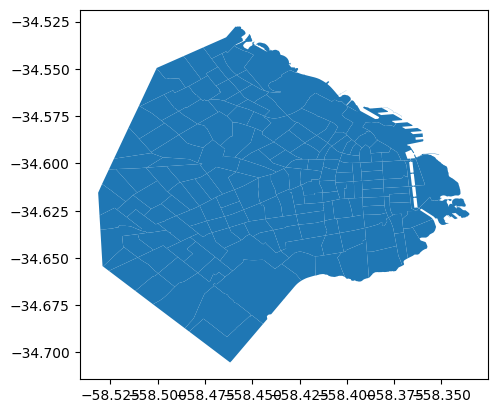

In [14]:
import geopandas as gpd


gdf = '/content/drive/MyDrive/AA DATOS/circuitos-electorales.csv'

import matplotlib.pyplot as plt

ruta_archivo_shapefile = '/content/drive/MyDrive/AA DATOS/circuitos-electorales.csv'

datos_geo = gpd.read_file(ruta_archivo_shapefile)

datos_geo.plot()

plt.show()

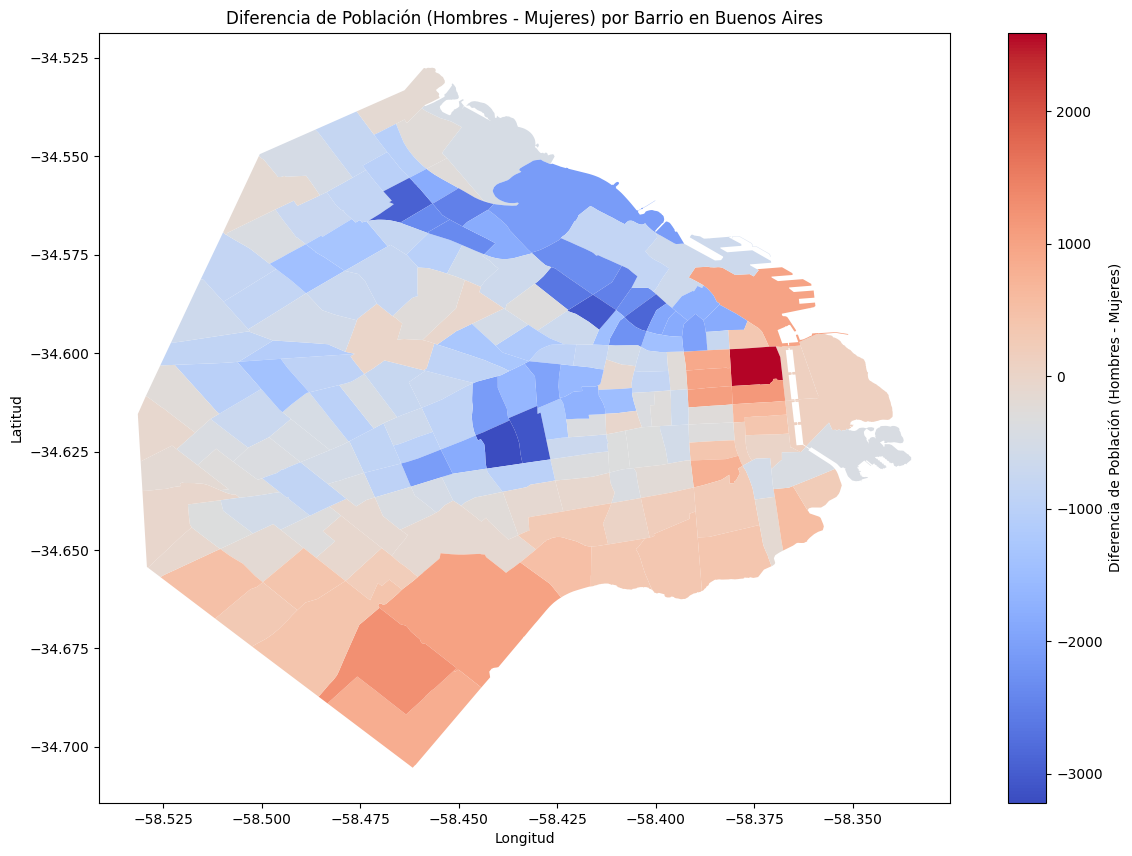

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Ruta al archivo CSV
ruta_archivo = '/content/drive/MyDrive/AA DATOS/circuitos-electorales.csv'

# Intentar abrir el archivo CSV con Pandas y convertirlo a GeoDataFrame

    # Lee el archivo CSV con Pandas
datos = pd.read_csv(ruta_archivo)

    # Convierte el DataFrame de Pandas a un GeoDataFrame
gdf = gpd.GeoDataFrame(datos, geometry=gpd.GeoSeries(datos['WKT'].apply(wkt.loads)))

    # Calcula la diferencia entre la población masculina y femenina
gdf['Diferencia_HM'] = gdf['MASCULINO'] - gdf['FEMENINO']

    # Configura la visualización
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Muestra la diferencia en un mapa divergente
gdf.plot(column='Diferencia_HM', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Diferencia de Población (Hombres - Mujeres)"})

    # Añade etiquetas y título
ax.set_title("Diferencia de Población (Hombres - Mujeres) por Barrio en Buenos Aires")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()



